<a href="https://colab.research.google.com/github/shv-om/predictive-analytics-models/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [ ]:
data = pd.read_csv("/content/data.csv")
data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
# df = [data['area_mean'], data['compactness_mean'], data['perimeter_mean']]
df = data[['radius_mean', 'perimeter_mean']]
df

,radius_mean,perimeter_mean
0,17.99,122.80
1,20.57,132.90
2,19.69,130.00
3,11.42,77.58
4,20.29,135.10
...,...,...
564,21.56,142.00
565,20.13,131.20
566,16.60,108.30
567,20.60,140.10


In [ ]:
nbrs = NearestNeighbors(n_neighbors=3)
nbrs.fit(df.values)

NearestNeighbors(n_neighbors=3)

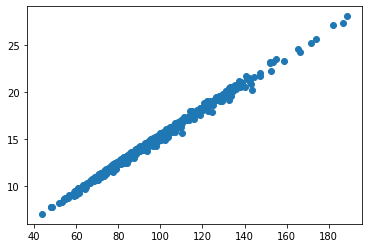

In [ ]:
plt.scatter(df['perimeter_mean'], df['radius_mean'])

In [ ]:
distances, index = nbrs.kneighbors(df.values)
distances

array([[0.        , 0.78638413, 0.93509358],
       [0.        , 0.26      , 0.41      ],
       [0.        , 0.10049876, 0.12      ],
       ...,
       [0.        , 0.26      , 0.51078371],
       [0.        , 1.24723695, 1.36824705],
       [0.        , 0.06753518, 0.42563012]])

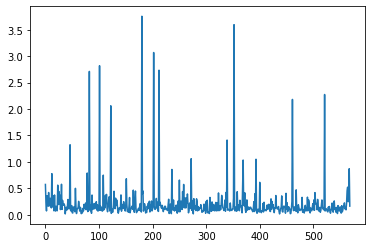

In [ ]:
plt.plot(distances.mean(axis=1))

In [ ]:
out = np.where(distances.mean(axis=1) > 1)
outlier_values = df.iloc[out]
outlier_values

,radius_mean,perimeter_mean
46,8.196,51.71
82,25.220,171.50
101,6.981,43.79
122,24.250,166.20
180,27.220,182.10
202,23.290,158.90
212,28.110,188.50
272,21.750,147.30
339,23.510,155.10
352,25.730,174.20


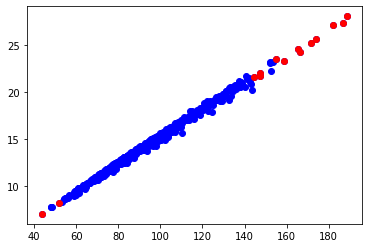

In [ ]:
# plot data
plt.scatter(df["perimeter_mean"], df["radius_mean"], color = "b")
plt.scatter(outlier_values["perimeter_mean"], outlier_values["radius_mean"], color = "r")